# Data science II

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1a/NumPy_logo.svg" width=400>

# [Numpy](https://www.numpy.org/)...

- lets us create N-dimensional arrays
- lets us efficiantly work with those arrays
- integrates with or is the basis for many other usefull packages like scipy, pandas, xarray, etc.

## What are arrays?

- like lists
- can have more dimensions that 1 (kind of like a list of lists when thinking about 2 dimensions)
- are easier to work with than list of lists

### Create arrays

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array([3., 6., 8., 7., 9., 4., 1., 6., 4., 4., 8.])
a

array([3., 6., 8., 7., 9., 4., 1., 6., 4., 4., 8.])

Arrays have some attributes like:

A dimension

In [6]:
a.ndim

1

A shape

In [5]:
a.shape

(11,)

and of course a data type

In [7]:
a.dtype

dtype('float64')

To create arrays with more dimensions we use list of lists as the first argument to `np.array`

In [70]:
smile = np.array([[0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 1, 1, 5, 1, 1, 5, 1, 1, 0],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                  [1, 1, 5, 1, 1, 1, 1, 5, 1, 1],
                  [0, 1, 1, 5, 1, 1, 5, 1, 1, 0],
                  [0, 0, 1, 1, 5, 5, 1, 1, 0, 0],
                  [0, 0, 0, 1, 1, 1, 1, 0, 0, 0]])

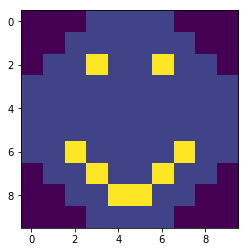

In [9]:
plt.imshow(smile)
plt.show()

This arrays attributes are:

In [12]:
smile.ndim

2

In [13]:
smile.shape

(10, 10)

In [14]:
smile.dtype

dtype('int64')

**Info**

There are more attributes for example
- size: gives the total number of elements
- itemsize: gives the memory size of one element
- nbytes: gives the total memory size of the array

Notice that by default numpy creates data types of 64 bit size. To create other types you need to specify the `dtype` argument in the array initalisation which takes one of the many data types listed in the documentation [here](https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html#arrays-scalars-built-in)

You can also always cast to a different data type later on:

In [16]:
a = a.astype(np.int32)
a.dtype

dtype('int32')

### Array shape

### Other ways to create arrays

Most of the time we don't want to create arrays with specific values by hand but need to initialize arrays of a certain shape to populate them with values later.
While there are more the following two are the most used ones.

Create array with zeros:

In [17]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Create an array with zeros based on the shape and dtype of another array:

In [18]:
np.zeros_like(smile)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

Create array with ones:

In [19]:
np.ones((5,5), dtype=np.float32)

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]], dtype=float32)

Similarly to the zeros case there is a function `np.ones_like`.<br>
Notice that additionally we can specify a dtype other than the default of np.float64.

**Task**

Two more conveniant functions are `np.arange(start, stop, n)` and `np.linspace(start, stop, n)`.
- Try them both and find out what they are each doing

### Accessing elements (indexing)

Array elements can be accessed similar to lists with the bracket notation.<br>
For higher dimensional arrays we need to know which index accesses a certain dimension or **axis**.
<img src="https://www.oreilly.com/library/view/elegant-scipy/9781491922927/assets/elsp_0105.png" width=900>

The following accesses the left eye of the smiley which is located in row 2 and column 3 (counts start at 0).

In [20]:
smile[2,3]

5

This can also be used to assign new values

In [24]:
smile[2,3] = 0

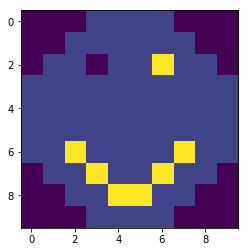

In [25]:
plt.imshow(smile)
plt.show()

### Slicing

Additionally to indexing slicing (again simillar to lists) is possible to select more than one lement.<br>
The general syntax is `[start:stop:step]`.

The following selects only the smile part of the smiley:

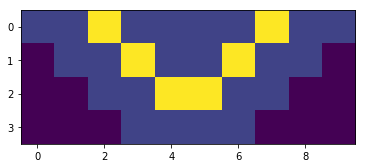

array([8, 4, 4, 6, 1, 4, 9, 7, 8, 6, 3], dtype=int32)

In [27]:
mouth = smile[6:, :]

plt.imshow(mouth)
plt.show()
a[:5]
# every other element
a[:2]
#negative step index => reversing
a[::-1]

Notice that we omitted the stop index while selecting rows and both start and stop index with the columns as well as the step size.<br>
By default numpy if an index is omitted slicing
- **starts at 0 (start omitted)**,
- **reaches to the end (stop is omitted)**
- and uses a **step size of 1 (step omitted)**.

We can also combine indexing and slicing.

The following "blindfolds" our smiley:

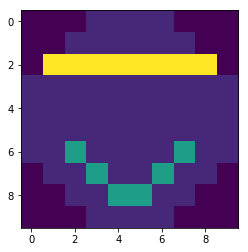

In [31]:
smile[2, 1:9] = 9

plt.imshow(smile)
plt.show()

**Task**

1. Copy the smile array init code from above so you don't have to type it yourself
2. Give the smiley a nose 2x2 elements big using the same value used for the eyes and mouth
3. What happens when you select a value of -1 for the step index while slicing (Hint: try it on both axis)?

### Reshaping

Sometimes data needs to be converted to another shape which can be done with the `reshape` method.

For example creating a 2d array from a 1d array

In [33]:
b = np.arange(1,10)
b

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
b.reshape(3,3)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

While in the special case of converting a 1D array to a vector can also be accomplished using `reshape` it is easier to use the following since no knowledge of the exact shape is necessary.

In [36]:
a

array([3, 6, 8, 7, 9, 4, 1, 6, 4, 4, 8], dtype=int32)

In [37]:
a[:, np.newaxis]

array([[3],
       [6],
       [8],
       [7],
       [9],
       [4],
       [1],
       [6],
       [4],
       [4],
       [8]], dtype=int32)

#### Flatten vs. Ravel

The opposite direction of creating a 1d array from a higher dimensional array can be done using either

In [40]:
smile.flatten()

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 9,
       9, 9, 9, 9, 9, 9, 9, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1,
       1, 5, 1, 1, 0, 1, 1, 5, 1, 1, 5, 1, 1, 0, 0, 0, 1, 1, 5, 5, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

or

In [39]:
smile.ravel()

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 9,
       9, 9, 9, 9, 9, 9, 9, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1,
       1, 5, 1, 1, 0, 1, 1, 5, 1, 1, 5, 1, 1, 0, 0, 0, 1, 1, 5, 5, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

The difference between the two is `flatten` returns a **copy** while `ravel` returns a **view** of the array.

### Views vs. copies

Remember our smiley

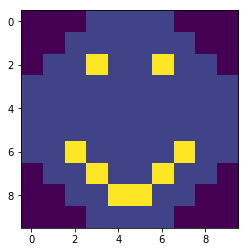

In [62]:
plt.imshow(smile)
plt.show()

Lets say we want to do some calculations on the mouth area of the array. A common workflow would be to select the corresponding part of the array first

In [71]:
nose = smile[4:9, 2:8]

array([[1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [5, 1, 1, 1, 1, 5],
       [1, 5, 1, 1, 5, 1],
       [1, 1, 5, 5, 1, 1]])

To be able to differentiate between the nose and the mouth we assign a new value to the nose

In [72]:
nose[0:2,2:4] = 20
nose

array([[1, 1, 9, 9, 9, 1],
       [1, 1, 9, 9, 9, 1],
       [5, 1, 1, 1, 1, 5],
       [1, 5, 1, 1, 5, 1],
       [1, 1, 5, 5, 1, 1]])

Now we could calculate for example occurance of each value in the array.

In [ ]:
Later on we want to keep working on the original array but notice

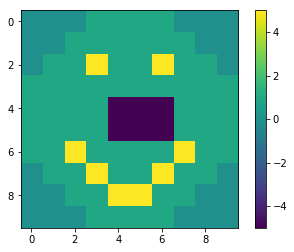

In [81]:
plt.imshow(smile)
plt.colorbar()
plt.show()

##### What happend?

Slicing returned a so called **view** of the array which points to the same memory and therefore if changed, changes the values in the original array too.

This is different to normal python lists where slicing returns a copy.

In order to keep a real copy of the array for later use you need to use the `np.copy()` method (which can also be used on slices):

```python
backup = smile.copy()
```

[Here](https://www.jessicayung.com/numpy-views-vs-copies-avoiding-costly-mistakes/), for example, you can find more information around advantages of copies and views 


| View | Copy |
| ---- | ---- |
|a[1,:]|      |
|np.ravel()|np.flatten()|

### Boolean operations

Using boolean operators we can test an array on where a certain condition is met.

In [76]:
smile > 8

array([[False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False,  True,  True,  True, False, False,
        False],
       [False, False, False, False,  True,  True,  True, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False]])

We can also use this array as a mask to select the corresponding elements from the array 

In [77]:
smile[smile > 8]

array([60, 60, 60, 60, 60, 60])

or assign new values to those locations

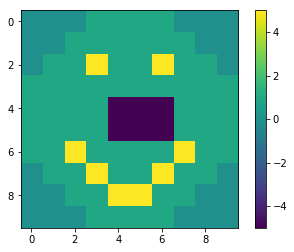

In [80]:
smile[smile > 8] = -5

plt.imshow(smile)
plt.colorbar()
plt.show()

#### Missing values

In arrays with data type float missing values are assigned `np.nan`

In [90]:
missing = np.arange(1.,5.)
missing[1:3] = np.nan
missing

array([ 1., nan, nan,  4.])

To handle these we can use boolean masks together with the `np.isnan` method

In [91]:
missing[np.isnan(missing)]

array([nan, nan])

Selecting all value which are not nan is also possible

In [92]:
missing[~np.isnan(missing)]

array([1., 4.])

### Aggregating

Numpy has many built in functions to calculate basic statistics for example the min (max), mean or standard deviation

np.sum 	np.nansum 	Compute sum of elements
np.prod 	np.nanprod 	Compute product of elements
np.mean 	np.nanmean 	Compute mean of elements
np.std 	np.nanstd 	Compute standard deviation
np.var 	np.nanvar 	Compute variance
np.min 	np.nanmin 	Find minimum value
np.max 	np.nanmax 	Find maximum value
np.argmin 	np.nanargmin 	Find index of minimum value
np.argmax 	np.nanargmax 	Find index of maximum value
np.median 	np.nanmedian 	Compute median of elements


In [96]:
np.max(smile)

5

These functions can be used together with the `axis` argument to calculate these statistics for any given axis

In [97]:
np.mean(smile, axis=1)

array([ 0.4,  0.6,  1.6,  1. , -0.8, -0.8,  1.8,  1.6,  1.4,  0.4])

In [98]:
np.std(smile, axis=1)

array([0.48989795, 0.48989795, 1.74355958, 0.        , 2.74954542,
       2.74954542, 1.6       , 1.74355958, 1.8547237 , 0.48989795])

These functions are very fast and should not be confused with other python built in function which might do the same,
for example sum.

In [99]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

81.9 ms ± 1.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
501 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Task**

1. Assign the following array to a new variable: `np.array([[1., np.nan, 7., 30., -4.], [-7., 18., 11., np.nan, 3.]])`
2. Select all but the last column and assign it to a new variable, keeping the old array as backup
3. Assign a new value to all nan's in the selection created in task 2
4. Try to calculate the median for the original array over the rows
5. Go to the numpy documentation [here](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html) and find a function which gets around the problem you encountered in task 4

### Ufuncs

### Broadcasting

<img src="https://scipy-lectures.org/_images/numpy_broadcasting.png" width=600, align=left><br>
<small>Source: https://scipy-lectures.org/_images/numpy_broadcasting.png</small>

### Fancy indexing

https://jakevdp.github.io/PythonDataScienceHandbook/02.07-fancy-indexing.html

## numpy

- np.random.random??
- combining arrays: np.concatenate, np.vstack/hstack
- transpose, masking?, np.tile, np.repeat



In [37]:
import xarray as xr

t = xr.open_dataset("/home/ro/Downloads/tg_ens_mean_0.25deg_reg_v19.0e.nc", chunks={'time': 10})
print(t)

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 464, time: 25202)
Coordinates:
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2018-12-31
Data variables:
    tg         (time, latitude, longitude) float32 dask.array<shape=(25202, 201, 464), chunksize=(10, 201, 464)>
Attributes:
    E-OBS_version:  19.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Mon Feb 18 12:46:55 2019: ncks -O -d time,0,25201 /data4/...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....


In [ ]:
climatology = t.groupby('time.month').mean('time')
anomalies = t.groupby('time.month') - climatology

print(anomalies.compute())

In [33]:
t = np.linspace(1,10,8)
print(t)
t = np.arange(1,11,1)
print(t)

t[t<5] = 17
print(t)

t = np.arange(1,11,1)
np.where(t<5, 17, t)

[ 1.          2.28571429  3.57142857  4.85714286  6.14285714  7.42857143
  8.71428571 10.        ]
[ 1  2  3  4  5  6  7  8  9 10]
[17 17 17 17  5  6  7  8  9 10]


array([17, 17, 17, 17,  5,  6,  7,  8,  9, 10])

<img src="https://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png">

# xarray
 - create DataArray, Dataset
 - .values, .coords, .dims, .attrs
 - indexing
 - computation: sin, cos, exp etc.
 - aggregation: .mean, etc. (can use dimension names instead of axis numbers!)
 - ds.drop() -> droping variables, ds.drop_dims("dim_name"), .rename ->rename variables
 - groupby? (sebastian introduce for pandas in unit 4?)
 - .to_series(), to_dataframe()
 - .to_netcdf()
 
 - dask?
 - load multiple datasets

In [15]:
from pathlib import Path
import xarray as xr

data_dir = Path("/home/ro/dev/python_course/mod06_l2/Daten_MSc_Kurs")

modis_file = "MYD08_D3.A2007001.006.2015087142520.hdf"
modis_file = "MOD06_L2.A2006019.1200.006.2014353175014.hdf"

data_file = data_dir / modis_file

#ds = xr.open_dataset(data_file, engine = "h5netcdf")
#print(ds)

In [48]:
from pyhdf.SD import SD, SDC
import numpy as np
import dask.array as da

print(data_file)

f = SD(str(data_file), SDC.READ)

print(f.info())
#print(f.datasets())
sd = f.select("Cloud_Water_Path")
#.info())
sd.__dict__["shape"] = sd.info()[2]
sd.__dict__["dtype"] = np.uint16
print(sd.__dict__)
da.from_array(sd, chunks=(500,500)).compute()
#sd.get()

/home/ro/dev/python_course/mod06_l2/Daten_MSc_Kurs/MOD06_L2.A2006019.1200.006.2014353175014.hdf
(127, 14)
{'_sd': <pyhdf.SD.SD object at 0x7fbae106e898>, '_id': 3407956, 'shape': [2030, 1354], 'dtype': <class 'numpy.uint16'>}


array([[-9999, -9999,   257, ..., -9999, -9999, -9999],
       [-9999, -9999,   312, ..., -9999, -9999, -9999],
       [-9999, -9999,   328, ..., -9999, -9999, -9999],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

## Dask

In [17]:
import xarray as xr

rs = np.random.RandomState(0)

array1 = xr.DataArray(rs.randn(1000, 100000), dims=['place', 'time'])

%time _ = array1.sum("time")

chunked1 = array1.chunk({'place': 10})
print(chunked1)

%time _ = chunked1.sum("time").compute()

CPU times: user 262 ms, sys: 248 ms, total: 511 ms
Wall time: 510 ms
<xarray.DataArray (place: 1000, time: 100000)>
dask.array<shape=(1000, 100000), dtype=float64, chunksize=(10, 100000)>
Dimensions without coordinates: place, time
CPU times: user 736 ms, sys: 0 ns, total: 736 ms
Wall time: 252 ms


## Exercise 5

- Complete the fifth assignment and push your results until tuesday 14:00 next week

In [2]:
"/home/ro/dev/python_course/mod06_l2/Daten_MSc_Kurs"

'/home/ro/dev/python_course/mod06_l2/Daten_MSc_Kurs'

In [1]:
import sys
sys.executable

'/home/ro/bin/miniconda3/envs/python_kurs/bin/python'

In [22]:
import numpy as np

t = np.array([[1,2,3,4,5]])
t2 = np.array([1,2,3,4,5])
#print(t)
print(t.shape)
print(t2.shape)
print(t2)
t3 = t2.reshape((5,1))
print(t3)
print(t3.shape)

(1, 5)
(5,)
[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]
(5, 1)
